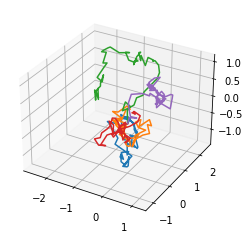

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
n = 50
T = 1.
time=np.linspace(0.,T,n)
dt = time[1] - time[0]
for run in range(5):
    zline = np.concatenate((np.zeros(shape=(1,)),np.cumsum(np.sqrt(dt)*np.random.normal(size=(n-1)))))
    xline = np.concatenate((np.zeros(shape=(1,)),np.cumsum(np.sqrt(dt)*np.random.normal(size=(n-1)))))
    yline = np.concatenate((np.zeros(shape=(1,)),np.cumsum(np.sqrt(dt)*np.random.normal(size=(n-1)))))
    ax.plot3D(xline,yline,zline)

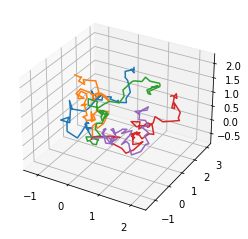

In [2]:
#final version and easy to read #dt missing
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
def monte_carlo_step3D(start_pt,time,division,scale):
    positionX = np.linspace(0.,time,division)
    positionY = np.linspace(0.,time,division)
    positionZ = np.linspace(0.,time,division)
    positionX[0] = start_pt[0]
    positionY[0] = start_pt[1]
    positionZ[0] = start_pt[2]
    shockX = np.zeros(division)
    shockY = np.zeros(division)
    shockZ = np.zeros(division)
    dt = positionX[1] - positionX[0]
    
    for x in range(1,division):
        shockX[x] = np.random.normal(dt, scale= scale * np.sqrt(dt))
        positionX[x] = positionX[x-1] + shockX[x]
        shockY[x] = np.random.normal(dt, scale= scale * np.sqrt(dt))
        positionY[x] = positionY[x-1] + shockY[x]
        shockZ[x] = np.random.normal(dt, scale= scale * np.sqrt(dt))
        positionZ[x] = positionZ[x-1] + shockZ[x]
    return [positionX,positionY,positionZ]

ax = plt.axes(projection='3d')
for run in range(5):
    data = monte_carlo_step3D((0,0,0),1,50,1)
    ax.plot3D(data[0],data[1],data[2])